In [48]:
from sklearn.tree import DecisionTreeClassifier
# Nazar Duası 

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

In [49]:
targets = pd.read_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_targets.csv')
objects = pd.read_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_objects.csv')
numerics = pd.read_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_numeric_atts.csv')

In [50]:
targets

,DelayLabel,DepDelay
0,Almost on time,-4.0
1,Almost on time,-5.0
2,Almost on time,-4.0
3,Early,-7.0
4,Almost on time,-3.0
...,...,...
291527,Delay,1191.0
291528,Almost on time,4.0
291529,Delay,81.0
291530,Almost on time,-2.0


In [51]:
target = targets.DelayLabel
del targets

In [52]:
target.shape

(291532,)

In [53]:
objects.shape

(291532, 8)

In [54]:
numerics.shape

(291532, 13)

In [55]:
# Attributes
X = np.concatenate([objects.values, numerics.values], axis=1)
print(X.shape)

(291532, 21)


In [56]:
# Target
y = target.values
print(y.shape)

(291532,)


In [57]:
# Decision Tree Classifier Model
modelDT = DecisionTreeClassifier(
    criterion='entropy',
    random_state=10)

In [58]:
# Çapraz doğrulama ile model performansını değerlendir
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_scores = {}

for metric in scoring_metrics:
    scores = cross_val_score(modelDT, X, y, cv=5, scoring=metric)
    cv_scores[metric] = scores

# Her bir skorlama metriği için çapraz doğrulama skorlarını yazdır
for metric, scores in cv_scores.items():
    print(f"{metric} Skorları: {scores}")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 959, in fit
    super()._fit(
  File "c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 242, in _fit
    X, y = self._validate_data(
  File "c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 617, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
ValueError: could not convert string to float: '1200-1259'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 959, in fit
    super()._fit(
  File "c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 242, in _fit
    X, y = self._validate_data(
  File "c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 617, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
ValueError: could not convert string to float: '1600-1659'


Veri setine encode uygulamayınca hata verdi. 😏 

Eh bir karar ağacı da olsan encode her algoritmaya şart 😊

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


objects_encoded = np.empty_like(objects)

for col_index in range(len(objects.columns)):
    objects_encoded[:, col_index] = le.fit_transform(objects.iloc[:, [col_index]])

c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:11

In [ ]:
objects_encoded

array([[10, 3, 17, ..., 501, 0, 938],
       [4, 3, 112, ..., 147, 6, 1026],
       [5, 3, 17, ..., 102, 2, 732],
       ...,
       [10, 11, 57, ..., 532, 689, 1030],
       [11, 11, 85, ..., 555, 22, 904],
       [11, 11, 85, ..., 555, 665, 904]], dtype=object)

In [ ]:
X_encoded = np.concatenate([objects_encoded, numerics.values], axis=1)
print(X.shape)

(291532, 21)


In [31]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# çok sınıflı target'lar için gerekli olan skorlama metriklerini import edelim

scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# macro ya da micro almak gerekir.


In [32]:
cv_scores = {}

# Çapraz doğrulama ile her bir k için eğitim ve test metrik skorları
for metric, scorer in scoring_metrics.items():
    scores_train = cross_val_score(modelDT, X_encoded, y, cv=5, scoring=scorer)
    cv_scores[metric + '_train'] = scores_train  # eğitim skorları
    
    scores_test = cross_val_score(modelDT, X_encoded, y, cv=5, scoring=scorer)
    cv_scores[metric + '_test'] = scores_test  # test skorları


In [33]:
# Her bir skorlama metriği için çapraz doğrulama skorlarını yazdır
for metric, scores in cv_scores.items():
    print(f"{metric} Skorları: {scores}")

accuracy_train Skorları: [0.99991425 0.99994855 0.99987994 0.99727301 0.9999657 ]
accuracy_test Skorları: [0.99991425 0.99994855 0.99987994 0.99727301 0.9999657 ]
precision_macro_train Skorları: [0.99993901 0.99993808 0.99987057 0.99649491 0.99996716]
precision_macro_test Skorları: [0.99993901 0.99993808 0.99987057 0.99649491 0.99996716]
recall_macro_train Skorları: [0.9998895  0.9999634  0.99989771 0.99803106 0.99996534]
recall_macro_test Skorları: [0.9998895  0.9999634  0.99989771 0.99803106 0.99996534]
f1_macro_train Skorları: [0.99991425 0.99995073 0.99988414 0.99725153 0.99996625]
f1_macro_test Skorları: [0.99991425 0.99995073 0.99988414 0.99725153 0.99996625]


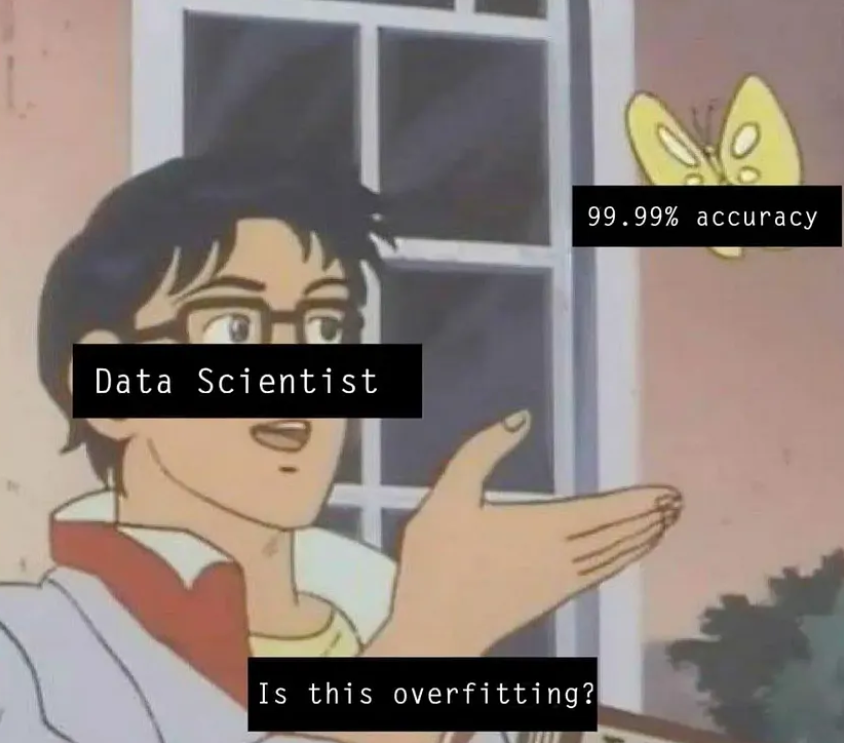

Indeed 😅

Here we go pruning!

Tune edilecek model parametreleri ve anlamları:

**max_depth:** Ağacın maksimum derinliğini kontrol eder. Ağaç ne kadar derinse, model o kadar karmaşık olur.

**min_samples_split:** Bir iç düğümü iki alt düğüme bölmek için gereken minimum örnek sayısını belirler.

**min_samples_leaf:** Bir yaprak düğümünde bulunması gereken minimum örnek sayısını belirler.

**max_leaf_nodes:** Ağaçtaki maksimum yaprak düğüm sayısını belirler.

In [34]:
from sklearn.model_selection import GridSearchCV

modelDT = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3,5,7,10],
    'min_samples_split': [2,4,6,8]
}

grid_search = GridSearchCV(modelDT, param_grid, cv=5)
grid_search.fit(X_encoded, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 4, 6, 8]})

In [35]:
print("En iyi parametreler:", grid_search.best_params_)

En iyi parametreler: {'max_depth': 10, 'min_samples_split': 6}


In [39]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Decision Tree Classifier Model Tuned
modelDT = DecisionTreeClassifier(
    criterion='entropy',
    random_state=10,
    max_depth=5,
    min_samples_split=6,
    max_leaf_nodes=20)

scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

cv_scores = {}

for metric, scorer in scoring_metrics.items():
    scores_train = cross_val_score(modelDT, X_encoded, y, cv=5, scoring=scorer)
    cv_scores[metric + '_train'] = scores_train  # eğitim skorları
    
    scores_test = cross_val_score(modelDT, X_encoded, y, cv=5, scoring=scorer)
    cv_scores[metric + '_test'] = scores_test  # test skorları

for metric, scores in cv_scores.items():
    print(f"{metric} Skorları: {scores}")

accuracy_train Skorları: [0.98598796 0.98279795 0.98585051 0.98392961 0.98224883]
accuracy_test Skorları: [0.98598796 0.98279795 0.98585051 0.98392961 0.98224883]
precision_macro_train Skorları: [0.98460212 0.98072788 0.98470228 0.98222438 0.98036264]
precision_macro_test Skorları: [0.98460212 0.98072788 0.98470228 0.98222438 0.98036264]
recall_macro_train Skorları: [0.987273   0.98493036 0.98684881 0.98559518 0.98412902]
recall_macro_test Skorları: [0.987273   0.98493036 0.98684881 0.98559518 0.98412902]
f1_macro_train Skorları: [0.98590058 0.98273424 0.98575168 0.98384947 0.98217   ]
f1_macro_test Skorları: [0.98590058 0.98273424 0.98575168 0.98384947 0.98217   ]


In [43]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier modeli oluştur
modelDT = DecisionTreeClassifier(
    criterion='entropy',
    random_state=10,
    max_depth=5,
    min_samples_split=6,
    max_leaf_nodes=20
)

# Cross-validation işlemi
cv_results = cross_validate(modelDT, X_encoded, y, cv=20, scoring='accuracy', return_train_score=True)

# Test seti üzerindeki skorlar
test_scores = cv_results['test_score']
print("Test Seti Accuracy Skorları:", test_scores)

# Eğitim seti üzerindeki skorlar
train_scores = cv_results['train_score']
print("Eğitim Seti Accuracy Skorları:", train_scores)

Test Seti Accuracy Skorları: [0.98243809 0.98374151 0.98847499 0.98929821 0.98182068 0.98182068
 0.98284969 0.98470193 0.98573095 0.98449612 0.98593675 0.98724017
 0.98346597 0.98456367 0.98435785 0.98332876 0.98428924 0.98257409
 0.97969265 0.98243688]
Eğitim Seti Accuracy Skorları: [0.98425376 0.98418516 0.98393602 0.98389269 0.98428626 0.98428626
 0.9842321  0.98413461 0.98408045 0.98414544 0.98406961 0.98400101
 0.98419966 0.98414189 0.98415272 0.98420688 0.98415633 0.9842466
 0.98439824 0.98425382]


Pruning yapmamıza rağmen hem train hem de test sonuçları çok yüksek accuracy değerine sahip. Buradan nasıl bir sonuç çıkarabiliriz?

Hedef değişken ile korelasyonu çok yüksek olan öznitelikler olabilir. Öncelikle **.feature_importances_** ile özniteliklerin modelin üzerindeki etkilerini gözlemleyelim. Öncesinde holdout ile modeli tekrar eğitelim. 


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=5)


# Modeli oluşturduk
modelDT = DecisionTreeClassifier(
    criterion='entropy',
    random_state=10,
    max_depth=5,
    min_samples_split=6,
    max_leaf_nodes=20
)

#Modeli eğittik
modelDT.fit(x_train, y_train)

# Modelin eğitim veri seti üzerinde performansı
# Öğrenememe (underfitting) durumu var mı?
train_pred = modelDT.predict(x_train)
train_accuracy = accuracy_score(y_train, train_pred)
print('Train set accuracy: ', train_accuracy)

# Modelin test veri seti üzerinde performansı
test_pred = modelDT.predict(x_test)
test_accuracy = accuracy_score(y_test, test_pred)
print('Test set accuracy: ', test_accuracy)

Train set accuracy:  0.984010545297738
Test set accuracy:  0.9845186370912417


In [63]:
attr_cols = objects.columns.to_list() + numerics.columns.to_list()

In [66]:
feautre_importances = modelDT.feature_importances_

for feature, importance in zip(attr_cols, feautre_importances):
    print(f'{feature}: {importance}')

DepTimeBlk: 0.0
Merged by Operating_Airline: 0.0
Merged by OriginAirportID: 0.0
Merged by DestAirportSeqID: 0.0
Merged by DepDelay: 0.9710007506445463
Merged by CRSArrTime: 0.0
Merged by ArrDelay: 0.028955707014999003
Merged by Distance: 0.0
Flight_Number_Marketing_Airline: 0.0
CRSDepTime: 0.0
DepTime: 0.0
TaxiOut: 4.3542340454666836e-05
TaxiIn: 0.0
ArrTime: 0.0
Cancelled: 0.0
Diverted: 0.0
CRSElapsedTime: 0.0
ActualElapsedTime: 0.0
AirTime: 0.0
Flights: 0.0
DivAirportLandings: 0.0


In [67]:
objects.head()

,DepTimeBlk,Merged by Operating_Airline,Merged by OriginAirportID,Merged by DestAirportSeqID,Merged by DepDelay,Merged by CRSArrTime,Merged by ArrDelay,Merged by Distance
0,1600-1659,DL / 19790 / DL,"10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...",1169706 / 11697 / 32467 / FLL / Fort Lauderdal...,-4.0 / 0.0 / 0.0 / -1.0,1821 / 1800-1859,-1.0 / 0.0 / 0.0 / -1.0,581.0 / 3
1,1000-1059,DL / 19790 / DL,11697 / 1169706 / 32467 / FLL / Fort Lauderdal...,1449202 / 14492 / 34492 / RDU / Raleigh/Durham...,-5.0 / 0.0 / 0.0 / -1.0,1227 / 1200-1259,-15.0 / 0.0 / 0.0 / -1.0,680.0 / 3
2,1100-1159,DL / 19790 / DL,"10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...",1244807 / 12448 / 32448 / JAN / Jackson/Vicksb...,-4.0 / 0.0 / 0.0 / -1.0,1142 / 1100-1159,-11.0 / 0.0 / 0.0 / -1.0,341.0 / 2
3,1200-1259,DL / 19790 / DL,12448 / 1244807 / 32448 / JAN / Jackson/Vicksb...,"1039707 / 10397 / 30397 / ATL / Atlanta, GA / ...",-7.0 / 0.0 / 0.0 / -1.0,1458 / 1400-1459,-23.0 / 0.0 / 0.0 / -2.0,341.0 / 2
4,0900-0959,DL / 19790 / DL,"14524 / 1452401 / 34524 / RIC / Richmond, VA /...","1039707 / 10397 / 30397 / ATL / Atlanta, GA / ...",-3.0 / 0.0 / 0.0 / -1.0,1050 / 1000-1059,-12.0 / 0.0 / 0.0 / -1.0,481.0 / 2


Şimdi sorun belli oldu 😅 Birleştirilmiş olarak sakladığımız depdelay kolonunu verisetinden çıkartmamışız.

In [68]:
# objects.drop(['Merged by DepDelay'], axis=1, inplace=True)

Yukarıdaki kolonu ekleyerek koda devam edeceğiz. Bunun için farklı bir jupyter note defteri kullanalım.